In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C:/Users/vlith/Downloads/Gtd work/data-society-global-terrorism-data/original/gtd_70to91_49566.csv",encoding='Latin')

C:\Users\vlith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,17,61,62,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df2 = pd.read_csv("C:/Users/vlith/Downloads/Gtd work/data-society-global-terrorism-data/original/gtd_92to11_no 93_55072.csv",encoding='Latin')

C:\Users\vlith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df3 = pd.read_csv("C:/Users/vlith/Downloads/Gtd work/data-society-global-terrorism-data/original/gtd1993_748.csv",encoding='Latin')

In [5]:
df4 = pd.read_csv("C:/Users/vlith/Downloads/Gtd work/data-society-global-terrorism-data/original/gtd_12to15_52134.csv",encoding='Latin')

C:\Users\vlith\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (66,116,117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
gtd = df1
gtd = gtd.append(df2,ignore_index=True)
gtd = gtd.append(df3,ignore_index=True)
gtd = gtd.append(df4,ignore_index=True)


C:\Users\vlith\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [7]:
gtd.shape

(157520, 137)

In [8]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157520 entries, 0 to 157519
Columns: 137 entries, INT_ANY to weaptype4_txt
dtypes: float64(63), int64(16), object(58)
memory usage: 164.6+ MB


In [9]:
gtd.head()

,INT_ANY,INT_IDEO,INT_LOG,INT_MISC,addnotes,alternative,alternative_txt,approxdate,attacktype1,attacktype1_txt,...,weapsubtype4,weapsubtype4_txt,weaptype1,weaptype1_txt,weaptype2,weaptype2_txt,weaptype3,weaptype3_txt,weaptype4,weaptype4_txt
0,0.0,0.0,0.0,0.0,NaN,NaN,.,NaN,1,Assassination,...,NaN,.,13,Unknown,NaN,.,NaN,.,NaN,.
1,1.0,1.0,0.0,1.0,NaN,NaN,.,NaN,6,Hostage Taking (Kidnapping),...,NaN,.,13,Unknown,NaN,.,NaN,.,NaN,.
2,1.0,-9.0,-9.0,1.0,NaN,NaN,.,NaN,1,Assassination,...,NaN,.,13,Unknown,NaN,.,NaN,.,NaN,.
3,1.0,-9.0,-9.0,1.0,NaN,NaN,.,NaN,3,Bombing/Explosion,...,NaN,.,6,Explosives/Bombs/Dynamite,NaN,.,NaN,.,NaN,.
4,1.0,-9.0,-9.0,1.0,NaN,NaN,.,NaN,7,Facility/Infrastructure Attack,...,NaN,.,8,Incendiary,NaN,.,NaN,.,NaN,.


In [10]:
gtd.columns

Index(['INT_ANY', 'INT_IDEO', 'INT_LOG', 'INT_MISC', 'addnotes', 'alternative',
       'alternative_txt', 'approxdate', 'attacktype1', 'attacktype1_txt',
       ...
       'weapsubtype4', 'weapsubtype4_txt', 'weaptype1', 'weaptype1_txt',
       'weaptype2', 'weaptype2_txt', 'weaptype3', 'weaptype3_txt', 'weaptype4',
       'weaptype4_txt'],
      dtype='object', length=137)

In [11]:
gtd.isnull().sum()

INT_ANY                748
INT_IDEO               748
INT_LOG                748
INT_MISC               748
addnotes            135199
alternative         133112
alternative_txt          0
approxdate          152757
attacktype1              0
attacktype1_txt          0
attacktype2         152517
attacktype2_txt          0
attacktype3         157206
attacktype3_txt          0
city                   446
claim2              156409
claim3              157359
claimed              66141
claimmode           144004
claimmode2          157104
claimmode2_txt           0
claimmode3          157442
claimmode3_txt           0
claimmode_txt            0
compclaim           152186
corp1                42608
corp2               149593
corp3               156725
country                  0
country_txt              0
                     ...  
targsubtype1          8903
targsubtype1_txt       748
targsubtype2        149051
targsubtype2_txt       748
targsubtype3        156660
targsubtype3_txt       748
t

# 1) How have casualties evolved throughout the years?

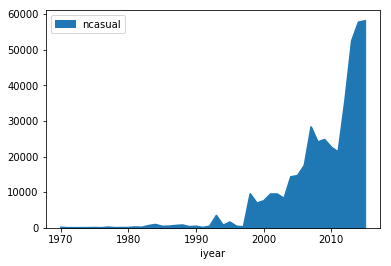

In [12]:
gtd['ncasual']=gtd['nkill']+gtd['nwound']-gtd['nkillter']-gtd['nwoundte']
gtd_cas=gtd[['iyear','ncasual']].groupby('iyear').sum()
gtd_cas.plot(kind='Area')

#  2) Are certain nationalities more targeted? If yes, which one? 

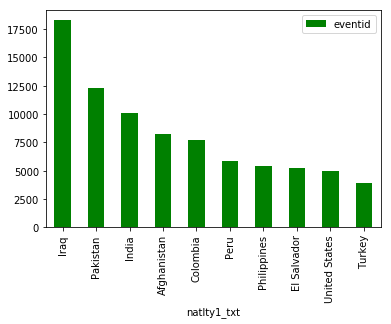

In [13]:
gtd_tar = gtd[['natlty1_txt','eventid']].groupby('natlty1_txt').count()

target_nat= gtd_tar.sort_values('eventid',ascending=[False]).head(10)



target_nat.plot(kind='bar',color='green')

# Are some countries better at defending themselves against terrorist attacks? If yes, which is the safest country to live 

In [14]:
gtd_safe = gtd[['country_txt','nkill','nwound','eventid','success']]
gtd_safe['Total']=gtd_safe['nkill']+gtd_safe['nwound']

safe = gtd_safe.groupby(['country_txt'])['Total'].count().reset_index()
s =gtd_safe[(gtd_safe['success']==0)  & (gtd_safe['Total']==0)]
safe_3 = s.groupby(['country_txt'])['Total'].count().reset_index()

total_safe=pd.merge(safe,safe_3, on='country_txt',how='inner') 
total_safe['Defend_Percent']= total_safe['Total_y']/total_safe['Total_x']*100
total_safe_final=total_safe.sort_values(by='Defend_Percent',ascending=False)
total_safe_final.head()


C:\Users\vlith\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country_txt,Total_x,Total_y,Defend_Percent
67,Ireland,224,138,61.607143
36,Dominica,2,1,50.000000
93,Mauritius,2,1,50.000000
103,New Zealand,18,9,50.000000
159,Vietnam,10,4,40.000000


# ) Terror attack pattern in United States vs Russian Federation/USSR in last 45 years

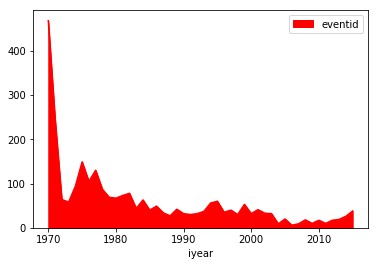

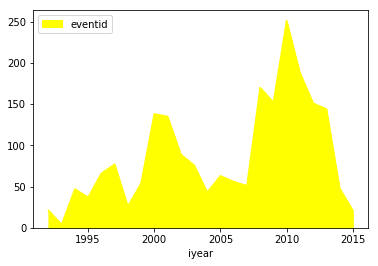

In [15]:
gtd_us=gtd[(gtd['country_txt']=='United States')]

gtd_rus=gtd[(gtd['country_txt']=='Russia')]


gtd_us = gtd_us[['iyear','eventid']].groupby('iyear').count()
gtd_rus = gtd_rus[['iyear','eventid']].groupby('iyear').count()

gtd_us.plot(kind='Area',color='red')
gtd_rus.plot(kind='Area',color='yellow')

# Terrorist attack in India and Pakistan in last 45 years 

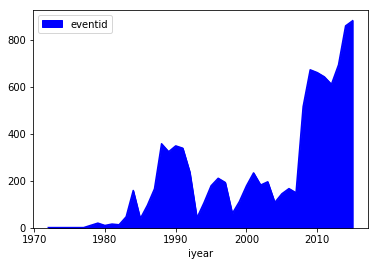

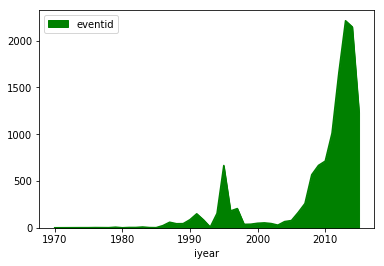

In [16]:
gtd_ind=gtd[(gtd['country_txt']=='India')]

gtd_pak=gtd[(gtd['country_txt']=='Pakistan')]


ind_year = gtd_ind[['iyear','eventid']].groupby('iyear').count()
pak_year = gtd_pak[['iyear','eventid']].groupby('iyear').count()

ind_year.plot(kind='Area',color='blue')
pak_year.plot(kind='Area',color='green')

# Heaviest hit Target types (Based on both Killed and wounded)

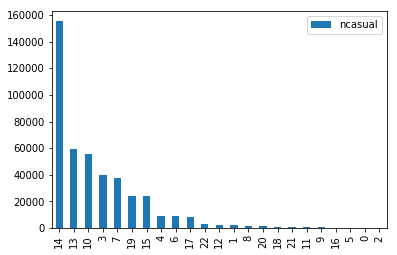

In [17]:
gtd_heavy=gtd[['targtype1_txt','ncasual']].groupby('targtype1_txt').sum()
gtd_heavy=gtd_heavy.reset_index()
gtd_heavy=gtd_heavy.sort_values(by='ncasual',ascending=False)
gtd_heavy.plot(kind='bar')

# # 1. Number of Attacks per year

In [20]:
gtd=gtd[['natlty1_txt','eventid']].count()
gtd

KeyError: "['natlty1_txt'] not in index"